In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin, freqz

plt.rcParams.update({"axes.grid": True, "font.size": 14})

In [20]:
# Parâmetros
num_bits = 1000  # Número de bits
roll_off_factor = 0.5  # Fator de roll-off
samples_per_symbol = 8  # Taxa de amostragem

# Questão 1: Gerar uma sequência de bits aleatórios
bits = np.random.randint(0, 2, num_bits)


# Mapear bits para símbolos 4-PAM
def bits_to_4pam(bits):
    symbols = []
    for i in range(0, len(bits), 2):
        symbol = 2 * bits[i] + bits[i + 1] - 1.5
        symbols.append(symbol)
    return np.array(symbols)


symbols = bits_to_4pam(bits)


# Filtro cosseno levantado
def rcosfilter(num_taps, roll_off, samples_per_symbol):
    t = np.linspace(
        -num_taps / (2 * samples_per_symbol),
        num_taps / (2 * samples_per_symbol),
        num_taps,
    )
    h = np.sinc(t) * np.cos(np.pi * roll_off * t) / (1 - (2 * roll_off * t) ** 2)
    h /= np.sqrt(np.sum(h**2))  # Normalizar a energia
    return h


num_taps = 101
rc_filter = rcosfilter(num_taps, roll_off_factor, samples_per_symbol)

# Filtrar os símbolos
upsampled_symbols = np.zeros(len(symbols) * samples_per_symbol)
upsampled_symbols[::samples_per_symbol] = symbols
filtered_signal = lfilter(rc_filter, 1.0, upsampled_symbols)

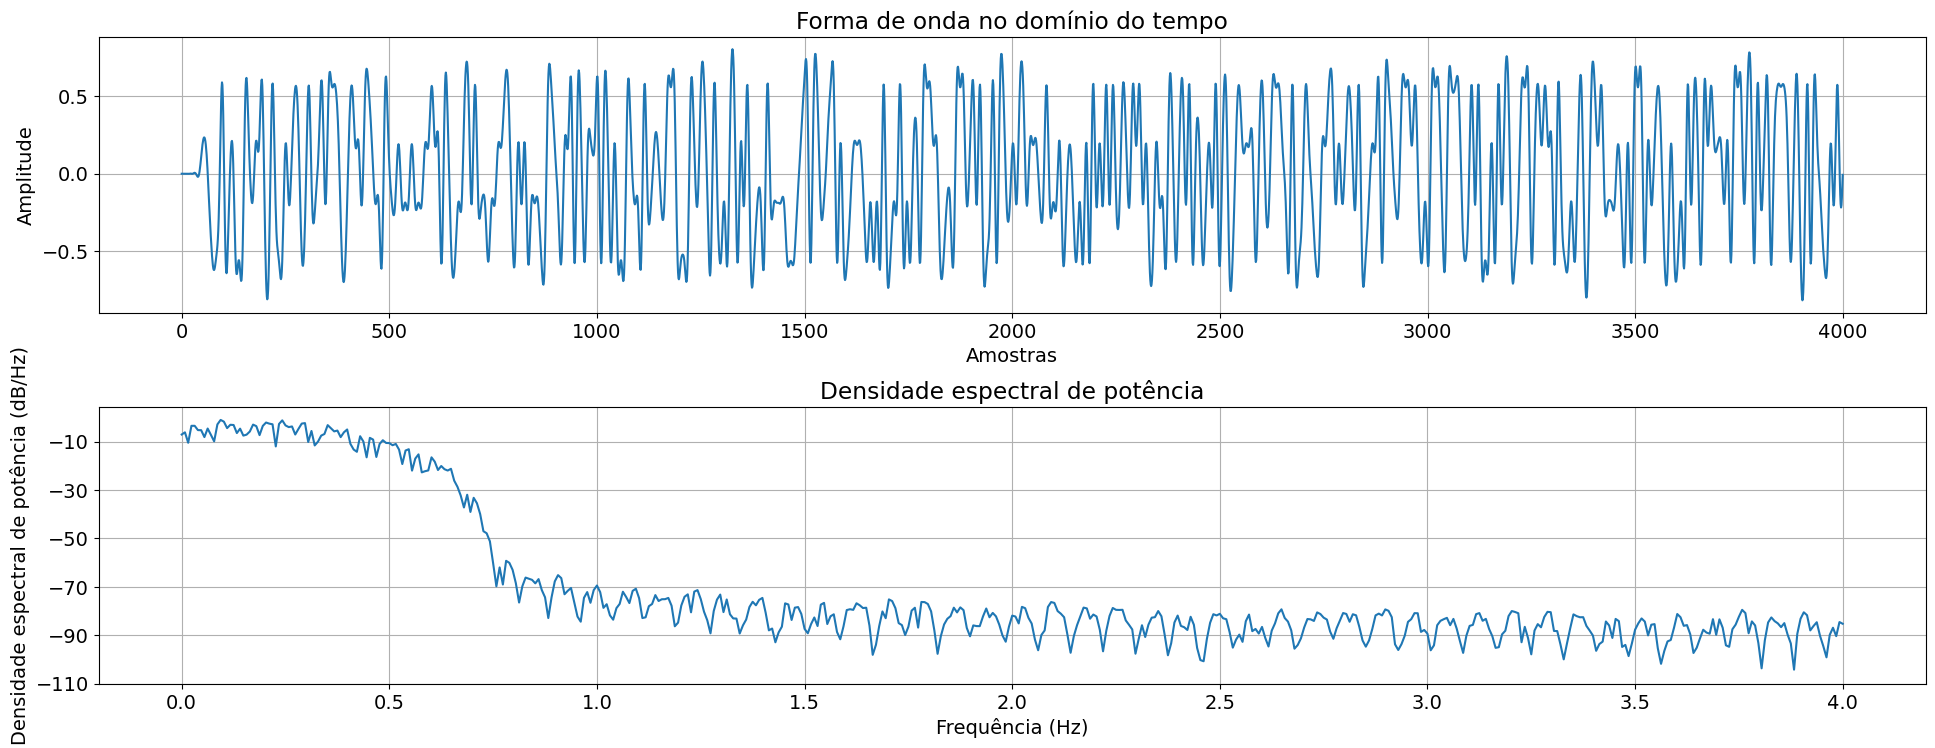

In [21]:
# Plotar a forma de onda resultante no domínio do tempo
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=3.0)

axs[0].plot(filtered_signal)
axs[0].set_title("Forma de onda no domínio do tempo")
axs[0].set_xlabel("Amostras")
axs[0].set_ylabel("Amplitude")


f, Pxx_den = axs[1].psd(
    filtered_signal, NFFT=1024, Fs=samples_per_symbol, scale_by_freq=True
)
axs[1].set_title("Densidade espectral de potência")
axs[1].set_xlabel("Frequência (Hz)")
axs[1].set_ylabel("Densidade espectral de potência (dB/Hz)")

plt.show()